In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

np.random.seed(42)

%matplotlib inline

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
dummies=pd.get_dummies(df.loc[:,["cut","color","clarity"]])

df[dummies.columns] = dummies
df.drop(df.iloc[:,[0,2,3,4,5,6]],inplace=True, axis=1)
df

,carat,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,326,3.95,3.98,2.43,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,326,3.89,3.84,2.31,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,327,4.05,4.07,2.31,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,334,4.20,4.23,2.63,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,335,4.34,4.35,2.75,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2757,5.75,5.76,3.50,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2757,5.69,5.75,3.61,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,2757,5.66,5.68,3.56,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,2757,6.15,6.12,3.74,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
train=df.sample(frac=0.8)
test=df.drop(train.index)
test.shape,train.shape

((10788, 25), (43152, 25))

In [36]:
trainy=train["price"].to_numpy()
trainx=train.drop(["price"],axis=1)
testy=test["price"].to_numpy()

testx=test.drop(["price"],axis=1).to_numpy()

trainx=trainx.to_numpy()
testx.shape,testy.shape,trainx.shape[0]

train.shape,trainx.shape

((43152, 25), (43152, 24))

In [ ]:
def mean_squared_error()

In [37]:
class Linear_regression:
    def __init__(self,x,y,alpha=0.01):
        self.x=x
        self.y=y
        self.alpha=alpha
        self.samples,self.features=x.shape
        self.theta=np.ones(shape=(self.features, 1))
        self.losses=[]
        #self.theta=np.reshape(self.theta,(self.theta.size,1))
        
    def predict(self,x):
        return np.dot(x, self.theta)
    
    def cost(self,theta):
        temp=self.y-np.dot(self.x,theta)
        loss=np.dot(temp.T,temp).item()
        loss=loss/(2*(self.samples))
        self.losses.append(loss)
        
    def training(self,n=1000):
        while(n):
            
            self.y_hat=np.dot(self.x,self.theta)
            temp=self.y-self.y_hat
            
            self.gradient=np.dot(self.x.T,temp)
            #print(self.gradient.shape)            
            self.theta=self.theta+((self.alpha/self.samples)*self.gradient)
            self.cost(self.theta)
            #print(self.theta.shape)
            n=n-1
    
        return self.theta
    
    def testing(self,x,theta):
        self.test_x=x
        self.test_y=np.dot(x,self.theta)
        print(self.test_y)
        return self.test_y
        

In [38]:
trainy=np.reshape(trainy,(trainy.size,1))
testy=np.reshape(testy,(testy.size,1))


In [39]:
bias_col = np.ones(shape=(trainx.shape[0], 1))
trainx = np.hstack((bias_col, trainx))
bias_col = np.ones(shape=(testx.shape[0], 1))

testx=np.hstack((bias_col, testx))
bias_col.shape,trainx.shape

((10788, 1), (43152, 25))

In [40]:
#trainx=trainx.transpose()
trainx.shape,trainy.shape

((43152, 25), (43152, 1))

In [41]:
train.shape,trainx.shape,trainx

((43152, 25),
 (43152, 25),
 array([[1.  , 0.24, 3.97, ..., 0.  , 1.  , 0.  ],
        [1.  , 0.58, 5.44, ..., 0.  , 0.  , 1.  ],
        [1.  , 0.4 , 4.76, ..., 0.  , 0.  , 1.  ],
        ...,
        [1.  , 0.41, 4.71, ..., 0.  , 1.  , 0.  ],
        [1.  , 1.09, 6.62, ..., 0.  , 0.  , 1.  ],
        [1.  , 0.3 , 4.25, ..., 0.  , 0.  , 0.  ]]))

In [42]:
model=Linear_regression(trainx,trainy)


In [43]:
mp=model.training(n=5000)

In [44]:
np.dot(model.x, mp), trainy

(array([[ 127.48735648],
        [3313.37204692],
        [1877.47507921],
        ...,
        [1733.16996283],
        [7713.85427232],
        [-193.81221884]]),
 array([[ 559],
        [2201],
        [1238],
        ...,
        [1169],
        [8364],
        [ 526]]))

In [45]:
pred=model.testing(testx,mp)
testx.shape

[[ -501.48171741]
 [ -974.44175531]
 [-2542.66185492]
 ...
 [ 2978.46307442]
 [ 3229.25586111]
 [ 3286.21150583]]


(10788, 25)

In [46]:
mean_squared_error(testy,pred)

1412421.8205040037

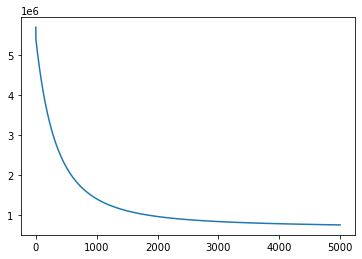

In [53]:
plt.plot(model.losses)